In [1]:
import h5py
import scipy.io as io
from PIL import Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from tqdm import tqdm
from scipy import spatial

from matplotlib import cm as CM
#from image import *
#%reload_ext autoreload        <------------— comment out 
#%autoreload 0                 <------------— comment out
%matplotlib inline

In [2]:
!pip install tqdm

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
def gaussian_filter_density(gt):
    #Generates a density map using Gaussian filter transformation
    
    density = np.zeros(gt.shape, dtype=np.float32)
    
    gt_count = np.count_nonzero(gt)
    
    if gt_count == 0:
        return density

    # FInd out the K nearest neighbours using a KDTree
    
    pts = np.array(list(zip(np.nonzero(gt)[1].ravel(), np.nonzero(gt)[0].ravel())))
    leafsize = 2048
    
    # build kdtree
    tree = spatial.KDTree(pts.copy(), leafsize=leafsize)
    
    # query kdtree
    distances, locations = tree.query(pts, k=4)

        
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        
        #Convolve with the gaussian filter
        
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    
    return density

In [4]:
root = os.path.join(os.getcwd(),'ShanghaiTech')
print(root)

c:\Users\hp\Desktop\CROWD-COUNTING-USING-CSRNET-master\ShanghaiTech


In [5]:
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_B_train,part_B_test]

In [10]:
path_sets

['c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/test_data\\images']

In [6]:
# List of all image paths

img_paths = []
for path in tqdm(path_sets):
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
print(len(img_paths))

100%|██████████| 2/2 [00:00<00:00, 124.91it/s]

716


In [13]:
img_paths


['c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_1.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_10.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_100.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_101.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_102.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_103.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_104.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_105.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\Shang

In [7]:

i = 0
for img_path in tqdm(img_paths):
        
    
    # Load sparse matrix
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    
    #Read image
    img= plt.imread(img_path)
    
    #Create a zero matrix of image size
    k = np.zeros((img.shape[0],img.shape[1]))
    
    gt = mat["image_info"][0,0][0,0][0]
    
    #Generate hot encoded matrix of sparse matrix
    for i in range(0,len(gt)):
       if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
           k[int(gt[i][1]),int(gt[i][0])]=1
    
    #generate density map
    k = gaussian_filter_density(k)
    
    #File path to save density map
    file_path = img_path.replace('.jpg','.h5').replace('images','ground-truth')
    
    with h5py.File(file_path, 'w') as hf:
           hf['density'] = k
    


100%|██████████| 716/716 [1:40:46<00:00,  8.45s/it]


In [ ]:
#understand this code, problem is coming from here
import h5py
import numpy as np

arr = np.random.randn(1000)

with h5py.File('ShanghaiTech\part_A/train_data\ground-truth/IMG_187.h5', 'w') as f:
    dset = f.create_dataset("default", data=arr)

In [9]:
img_paths

['c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_1.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_10.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_100.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_101.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_102.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_103.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_104.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\ShanghaiTech\\part_B/train_data\\images\\IMG_105.jpg',
 'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master\\Shang

In [14]:
file_path = os.path.join(os.getcwd(),img_paths[22].replace('.jpg','.h5').replace('images','ground-truth') )
print(file_path)


c:\Users\hp\Desktop\CROWD-COUNTING-USING-CSRNET-master\ShanghaiTech\part_B/train_data\ground-truth\IMG_119.h5


Sum =  300.65756
c:\Users\hp\Desktop\CROWD-COUNTING-USING-CSRNET-master\ShanghaiTech\part_B/train_data\ground-truth\IMG_119.h5


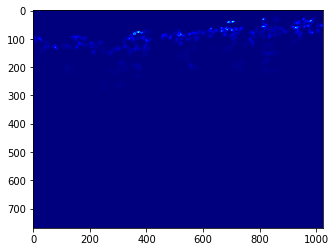

In [15]:
#Sample Ground Truth
gt_file = h5py.File(file_path,'r')

groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)
print("Sum = " ,np.sum(groundtruth))
print(file_path)

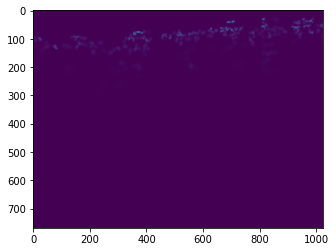

In [50]:
plt.imshow(groundtruth)

c:\Users\hp\Desktop\CROWD-COUNTING-USING-CSRNET-master\ShanghaiTech\part_B/train_data\ground-truth\IMG_119.h5


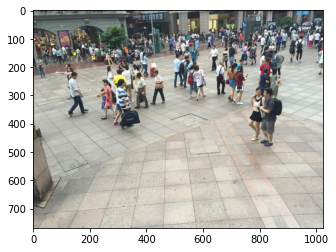

In [16]:
# Image corresponding to the ground truth
img = Image.open(file_path.replace('.h5','.jpg').replace('ground-truth','images'))
plt.imshow(img)
print(file_path)

In [26]:
print(arr)

[-1.19887236e+00  3.44537975e-01  6.97271833e-02  4.37156423e-01
 -7.01607597e-01 -4.08506113e-01 -1.62762956e-01 -9.10401783e-03
 -5.06211418e-01  5.74675437e-01 -1.37683385e+00  1.45457192e+00
 -9.95555956e-01 -1.55228551e+00 -3.33889871e-01 -1.04245879e+00
 -1.05126967e+00  1.73204836e-01 -9.06780736e-01 -2.21077768e-01
 -1.23034183e+00  3.82256242e-01  3.57698899e+00 -8.12513112e-02
  1.05249783e+00 -1.01371235e+00  3.97874885e-02  1.42845615e+00
 -1.20462003e+00 -7.43609228e-01 -5.21535239e-01 -1.15686258e-01
 -1.61256076e-02 -2.15074785e-01 -1.10875350e+00 -3.29803396e-01
 -3.06657139e-01 -5.01940185e-01  3.99398601e-01  1.14096090e+00
  3.28659740e-01 -1.76880202e-01 -9.35438977e-02  1.49016932e-01
 -1.12612695e+00 -8.04073438e-01 -1.34521403e+00  9.64111549e-01
 -1.07906672e+00 -3.13378637e-01  8.19986844e-01 -2.58809160e-01
 -6.09200141e-01  1.65157954e-01 -5.86517382e-01  5.88617338e-01
 -3.75478495e-01 -1.30659253e+00  4.19930606e-01  9.02285958e-01
  2.60988801e-01 -7.81699

In [20]:
os.getcwd()

'c:\\Users\\hp\\Desktop\\CROWD-COUNTING-USING-CSRNET-master'

In [21]:
len(gt)

113

In [22]:
print(k)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [7.3202764e-06 7.3320216e-06 7.3424007e-06 ... 1.7773458e-05
  1.7572180e-05 1.7370006e-05]
 [7.1530799e-06 7.1645568e-06 7.1746990e-06 ... 1.7488357e-05
  1.7290360e-05 1.7091483e-05]
 [6.9883831e-06 6.9995958e-06 7.0095048e-06 ... 1.7205335e-05
  1.7010592e-05 1.6814985e-05]]


In [23]:
    pts = np.array(list(zip(np.nonzero(k)[1].ravel(), np.nonzero(k)[0].ravel())))


In [24]:
pts.shape

(562318, 2)

In [25]:
i=int(0)
for pt in pts:
    print(pt)
    i+=1
    if i==50:
        break

[790  40]
[791  40]
[792  40]
[793  40]
[794  40]
[795  40]
[796  40]
[797  40]
[798  40]
[799  40]
[800  40]
[801  40]
[802  40]
[803  40]
[804  40]
[805  40]
[806  40]
[807  40]
[808  40]
[809  40]
[810  40]
[811  40]
[812  40]
[813  40]
[814  40]
[815  40]
[816  40]
[817  40]
[818  40]
[819  40]
[820  40]
[821  40]
[822  40]
[823  40]
[824  40]
[825  40]
[826  40]
[827  40]
[828  40]
[829  40]
[830  40]
[831  40]
[832  40]
[833  40]
[834  40]
[835  40]
[836  40]
[837  40]
[838  40]
[839  40]
